# 1. Library Imports

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

#setting max rows visibility
pd.options.display.max_rows = 40000

#setting max columns visibility to none
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

# 2. Dataset import and analysis

In [232]:
housing_df = pd.read_csv('train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [233]:
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [234]:
# describing the dataset - to get basic insights about the data
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [235]:
# checking the duplicates rows in the dataset
print('Number of duplicate rows in dataset:', housing_df.duplicated().sum())

# Observation: All the records are unique

Number of duplicate rows in dataset: 0


In [236]:
# checking the missing or null values
print('columns with null values: \n', housing_df.isnull().sum().sort_values(ascending=False))
print('Number of columns with null values:')
len(housing_df.isnull().sum())

# Observation: There are 81 columns which have some null values

columns with null values: 
 PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
Bsmt

81

#### Checking the percentage null values for each column

In [237]:
round(housing_df.isnull().sum()/len(housing_df.index), 2).sort_values(ascending=False)

PoolQC           1.00
MiscFeature      0.96
Alley            0.94
Fence            0.81
FireplaceQu      0.47
LotFrontage      0.18
GarageYrBlt      0.06
GarageFinish     0.06
GarageType       0.06
GarageQual       0.06
GarageCond       0.06
BsmtExposure     0.03
BsmtQual         0.03
BsmtCond         0.03
BsmtFinType2     0.03
BsmtFinType1     0.03
MasVnrType       0.01
MasVnrArea       0.01
Id               0.00
Functional       0.00
Fireplaces       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
TotRmsAbvGrd     0.00
GarageCars       0.00
LowQualFinSF     0.00
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
GrLivArea        0.00
HeatingQC 

### Data Cleaning

##### With 50% null values threshold in mind picking only those columns which have >50% null values

In [238]:
percentage_null = housing_df.isnull().sum()/len(housing_df.index)
round(percentage_null, 2)[round(percentage_null, 2).values>0.50].sort_values(ascending=False)

PoolQC         1.00
MiscFeature    0.96
Alley          0.94
Fence          0.81
dtype: float64

In [239]:
columns_to_delete = list(round(percentage_null, 2)[round(percentage_null, 2).values>0.50].index)
print(columns_to_delete)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [240]:
housing_df = housing_df.drop(columns_to_delete, axis=1)
# Result: We have removed total 4 columns from the originial dataframe

In [241]:
housing_df.shape

(1460, 77)

### Now considering what we have done above we are now left with <=50% of null values at columns, which won't harm our analysis and model generation

In [242]:
# Checking the null values again
round(housing_df.isnull().sum()/len(housing_df.index), 2).sort_values(ascending=False)

FireplaceQu      0.47
LotFrontage      0.18
GarageType       0.06
GarageYrBlt      0.06
GarageFinish     0.06
GarageQual       0.06
GarageCond       0.06
BsmtFinType1     0.03
BsmtQual         0.03
BsmtCond         0.03
BsmtExposure     0.03
BsmtFinType2     0.03
MasVnrType       0.01
MasVnrArea       0.01
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
KitchenQual      0.00
TotRmsAbvGrd     0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
Functional       0.00
GrLivArea        0.00
Id               0.00
Fireplaces       0.00
ScreenPorch      0.00
SaleCondition    0.00
SaleType         0.00
YrSold           0.00
MoSold           0.00
MiscVal          0.00
PoolArea         0.00
3SsnPorch        0.00
2ndFlrSF         0.00
EnclosedPorch    0.00
OpenPorchSF      0.00
WoodDeckSF       0.00
PavedDrive       0.00
GarageArea       0.00
GarageCars       0.00
LowQualFinSF     0.00
Heating          0.00
1stFlrSF         0.00
LandSlope        0.00
OverallQua

Before imputing the null columns lets convert the year columns with the age of the house. So what I meant here that instead of saying that the particular property have something since this year, lets say that it is x year old. So in our dataset we data till year 2010. Taking that into consideration we will create new columns for year features

### Deriving new columns

In [243]:
housing_df['YearBuilt_Old'] = housing_df.YearBuilt.max()-housing_df.YearBuilt
housing_df['YearRemodAdd_Old'] = housing_df.YearRemodAdd.max()-housing_df.YearRemodAdd
housing_df['GarageYrBlt_Old'] = housing_df.GarageYrBlt.max()-housing_df.GarageYrBlt
housing_df['YrSold_Old'] = housing_df.YrSold.max()-housing_df.YrSold
housing_df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
175,1950,2001,1950.0,2007,60,9,60.0,3
419,1968,1968,1968.0,2010,42,42,42.0,0
1127,2004,2004,2004.0,2007,6,6,6.0,3
905,1954,1954,1954.0,2010,56,56,56.0,0
2,2001,2002,2001.0,2008,9,8,9.0,2
1071,1968,1968,1968.0,2009,42,42,42.0,1
1177,1926,2004,1926.0,2009,84,6,84.0,1
920,1994,1994,1994.0,2007,16,16,16.0,3
497,1925,1950,1925.0,2008,85,60,85.0,2
476,1997,1998,1997.0,2008,13,12,13.0,2


#### Dropping the acutal year columns as we have newly derived one

In [244]:
housing_df = housing_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1)

### Imputing Null Values

In [245]:
percentage_null = round(housing_df.isnull().sum()/len(housing_df.index), 2)
columns_to_impute = list(round(percentage_null, 2)[round(percentage_null, 2).values>0.00].index)
print(columns_to_impute)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt_Old']


In [246]:
# checking the mean and mode for numerical or categorical features and using them to impute
# the values
from numpy import float64, int64

for col in columns_to_impute:
    if housing_df[col].dtype == int64 or housing_df[col].dtype == float64:
        print(col, housing_df[col].mean())
    else:
        print(col, housing_df[col].mode())

LotFrontage 70.04995836802665
MasVnrType 0    None
Name: MasVnrType, dtype: object
MasVnrArea 103.68526170798899
BsmtQual 0    TA
Name: BsmtQual, dtype: object
BsmtCond 0    TA
Name: BsmtCond, dtype: object
BsmtExposure 0    No
Name: BsmtExposure, dtype: object
BsmtFinType1 0    Unf
Name: BsmtFinType1, dtype: object
BsmtFinType2 0    Unf
Name: BsmtFinType2, dtype: object
FireplaceQu 0    Gd
Name: FireplaceQu, dtype: object
GarageType 0    Attchd
Name: GarageType, dtype: object
GarageFinish 0    Unf
Name: GarageFinish, dtype: object
GarageQual 0    TA
Name: GarageQual, dtype: object
GarageCond 0    TA
Name: GarageCond, dtype: object
GarageYrBlt_Old 31.493836113125454


##### Assumptions:
1. For GaragetYrBlt_Old we are imputing -1 for null values as we are considering that Garage is not available for that property
2. For FireplaceQu will be applying Not applicable as it can be good possibility that houses may don't have it installed

In [247]:
housing_df.MasVnrType.fillna('None', inplace=True)
housing_df.MasVnrArea.fillna(housing_df.MasVnrArea.mean(), inplace=True)
housing_df.BsmtQual.fillna('TA', inplace=True)
housing_df.BsmtCond.fillna('TA', inplace=True)
housing_df.BsmtExposure.fillna('No',inplace=True)
housing_df.BsmtFinType1.fillna('Unf',inplace=True)
housing_df.BsmtFinType2.fillna('Unf',inplace=True)
housing_df.GarageType.fillna('Attchd',inplace=True)
housing_df.GarageYrBlt_Old.fillna(-1,inplace=True)
housing_df.GarageFinish.fillna('Unf',inplace=True)
housing_df.GarageQual.fillna('TA',inplace=True)
housing_df.GarageCond.fillna('TA',inplace=True)
housing_df.FireplaceQu.fillna('Not_applicable', inplace=True)
housing_df.LotFrontage.fillna(housing_df.LotFrontage.mean(), inplace=True)

#### looking some more features and there values

In [248]:

housing_df.Street.value_counts()

# Observation: We can see Street data is quite biased and won't help us making our model better, so we will drop it

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [249]:
housing_df.Utilities.value_counts()

# Observation: Again we can see that Utilities data is also biased so we will drop

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [250]:
# Dropping Street, Utitlities and Id (as it is also not of any use)
housing_df = housing_df.drop(['Street', 'Utilities', 'Id'], axis=1)

##### Creating dataframes for numerical and categroical features

In [251]:
numerical_features_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_features_df = housing_df.select_dtypes(include=['object'])

#### Describing the numerical features

In [252]:
numerical_features_df.describe()

# Observation: We can say in some numerical features we have outliers. We will perform the outlier detecion and remove those.

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,22.024023,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


## Analysis on Numerical Features

### Outlier Detection

##### As we have describe the features above we can see that we have outliers in data, lets look them closely

In [253]:
def create_outlier_percentage_df(df):
    outlier_percentage = {}
    for feature in df.columns:
        inter_quartile_range = df[feature].quantile(.75) - df[feature].quantile(.25)
        upper_range = df[feature].quantile(.75) + (1.5*inter_quartile_range)
        lower_range = df[feature].quantile(.25) - (1.5*inter_quartile_range)
        outlier_count = df[(df[feature] > upper_range) | (df[feature] < lower_range)].shape[0]
        outlier_percentage[feature] = round(outlier_count/df.shape[0]*100, 2)
    return outlier_percentage

In [254]:
outlier_percentage_obj = create_outlier_percentage_df(numerical_features_df)
outliers_df = pd.DataFrame({'Features': list(outlier_percentage_obj.keys()), 'Percentage': list(outlier_percentage_obj.values())})
outliers_df.sort_values(by='Percentage', ascending=False)

,Features,Percentage
26,EnclosedPorch,14.25
7,BsmtFinSF2,11.44
4,OverallCond,8.56
28,ScreenPorch,7.95
1,LotFrontage,7.26
0,MSSubClass,7.05
5,MasVnrArea,6.71
15,BsmtHalfBath,5.62
25,OpenPorchSF,5.27
2,LotArea,4.73


##### Observations:
1. We can see majority of numerical features have outliers
2. Dropping the rows which have the outlier value will impact our solution
3. We will treat the outliers by reassigning the fixed lower range and upper range values to feature values that are outside both the upper and lower IQR
4. One more point to note that we won't do anything for SalePrice column as it is our target variable

In [255]:
for feature in outliers_df.Features.values:
    if(feature != 'SalePrice'):
        inter_quartile_range = housing_df[feature].quantile(.75) - housing_df[feature].quantile(.25)
        upper_range_value = housing_df[feature].quantile(.75) + (1.5*inter_quartile_range)
        lower_range_value = housing_df[feature].quantile(.25) - (1.5*inter_quartile_range)
        housing_df[feature][housing_df[feature] > upper_range_value] = upper_range_value
        housing_df[feature][housing_df[feature] < lower_range_value] = lower_range_value

In [256]:
# checking our main dataframe after re-assigning the values
housing_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,55.085616,69.276671,9647.388014,6.100685,5.543493,89.974474,439.997517,0.0,563.777740,1050.254795,1157.018151,346.789041,0.0,1503.735873,0.425000,0.0,1.565068,0.382877,2.851712,1.0,6.487671,0.611301,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,180921.195890,38.700685,25.134247,29.690753,2.184247
std,37.508183,17.235602,3594.356399,1.378430,0.963696,133.856899,433.219435,0.0,431.710214,397.937878,362.583002,435.791621,0.0,481.375641,0.517373,0.0,0.550916,0.502885,0.759516,0.0,1.541916,0.638959,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,79442.502883,30.108397,20.645407,25.120731,1.328095
min,20.000000,31.500000,1481.500000,2.000000,3.500000,0.000000,0.000000,0.0,0.000000,42.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,0.0,1129.500000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,0.0,1464.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,0.0,1776.750000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,145.000000,107.500000,17673.500000,10.000000,7.500000,410.625000,1780.625000,0.0,1685.500000,2052.000000,2155.125000,1820.000000,0.0,2747.625000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,755000.000000,125.000000,60.000000,109.500000,4.000000


### Univariate and Bivariate Analysis

### Ploting scatter plots against target variable to look into some patterns for continuous variables

In [257]:
def build_scatter_subplots(df, predictor_feature_list, target_variable, figureSize, cols, rows):
    rows = len(predictor_feature_list)//cols
    plt.figure(figsize=figureSize)
    for i, feature in enumerate(predictor_feature_list):
        plt.subplot(rows, cols, i+1)
        plt.scatter(df[feature], target_variable)
        plt.xlabel(predictor_feature_list[i])
        plt.ylabel(target_variable.name)

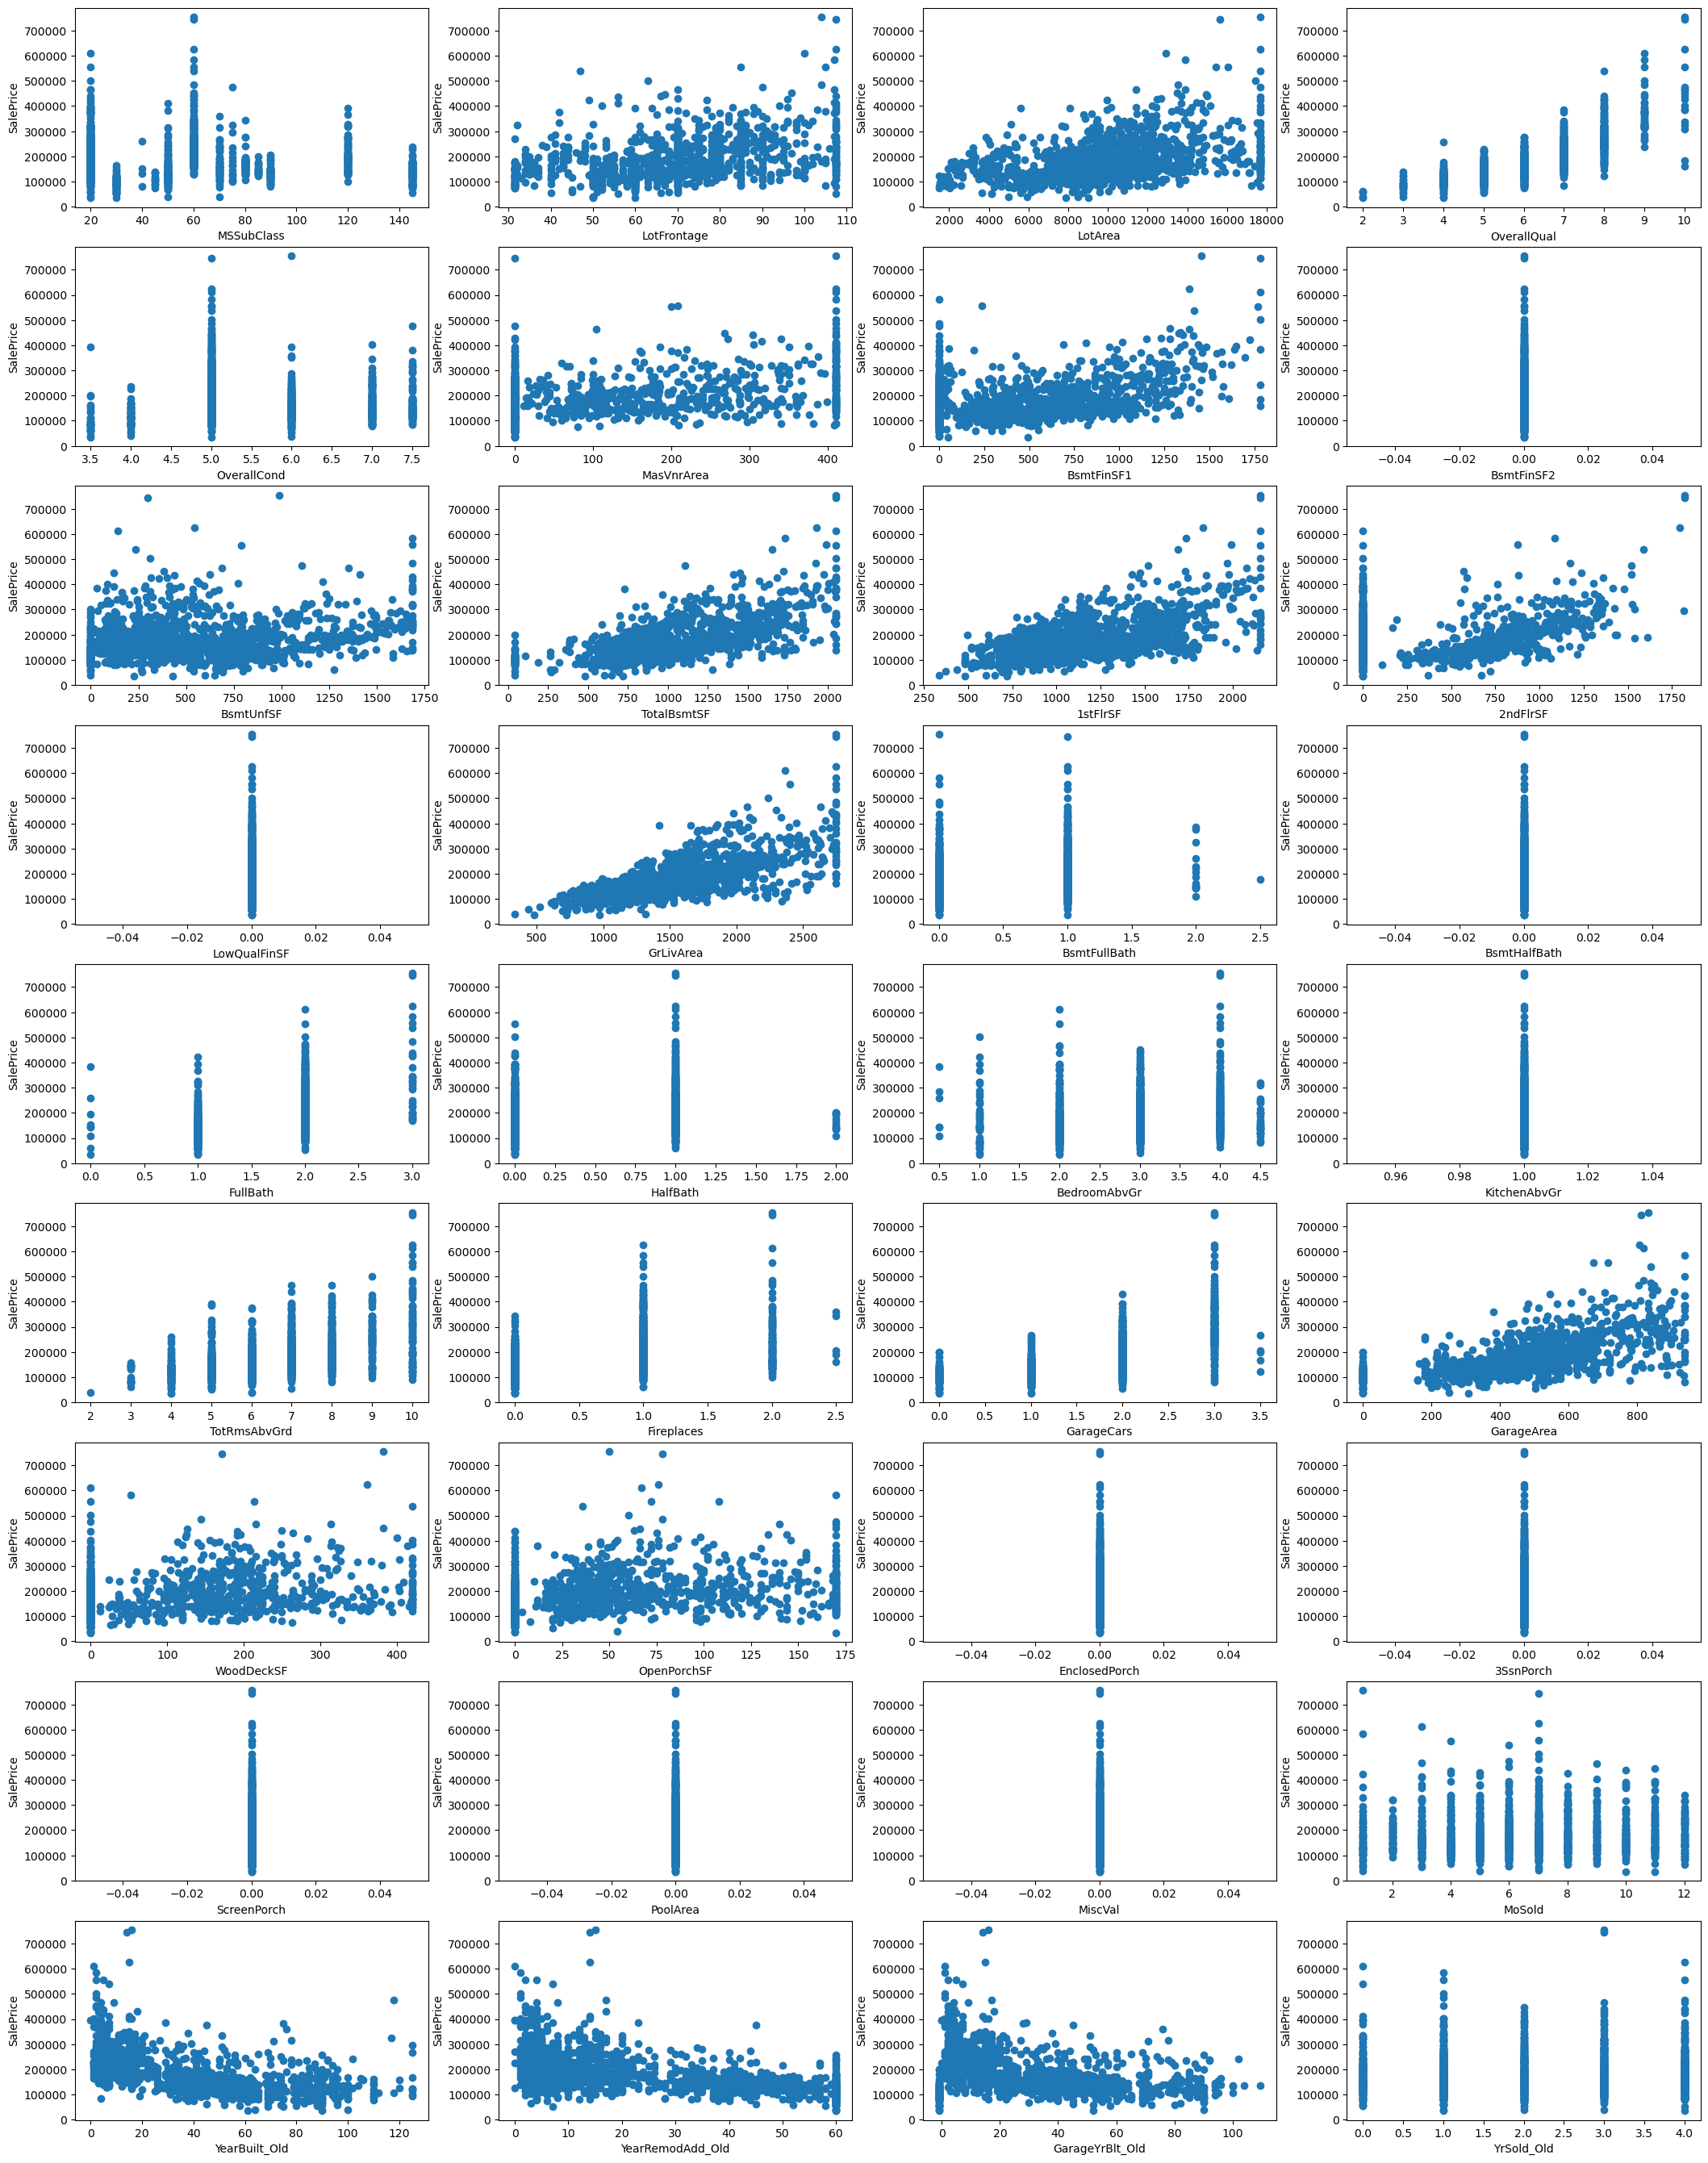

In [258]:
numeric_features = list(housing_df.dtypes[housing_df.dtypes!='object'].index)
numeric_features.remove(housing_df.SalePrice.name)
build_scatter_subplots(housing_df, numeric_features, housing_df.SalePrice, (26,34), 4, 8)

##### Observations: 
1. So based on the above plots we can see a strong positive correlation with SalePrice for these features in descending order -> MasVnrArea, TotalBsmtSF 1stFlrSF, 2ndFlrSF, GrLivArea, GarageAread, WoodDeckSF, OpenPorchSF. 
2. One more obvious thing to note here that as the property gets older its sales price is less and we can see this patter from our last YearBuilt_Old vs. SalePrice graph.
4. 
5. We can drop MiscVal, PoolArea, ScreenPorch, 3SsnPorch, EnclosedPorch, KitchenAbvGr, BsmtHalfBath, LowQualFinSF, BsmtFinSF2, as they have constant value

In [259]:
# dropping the variables as decided above
housing_df.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'KitchenAbvGr', 'BsmtHalfBath', 'LowQualFinSF', 'BsmtFinSF2'], axis=1, inplace=True)

In [260]:
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'YearBuilt_Old', 'YearRemodAdd_Old',
       'GarageYrBlt_Old', 'YrS

#### Lets see the correlation matrix for the current data

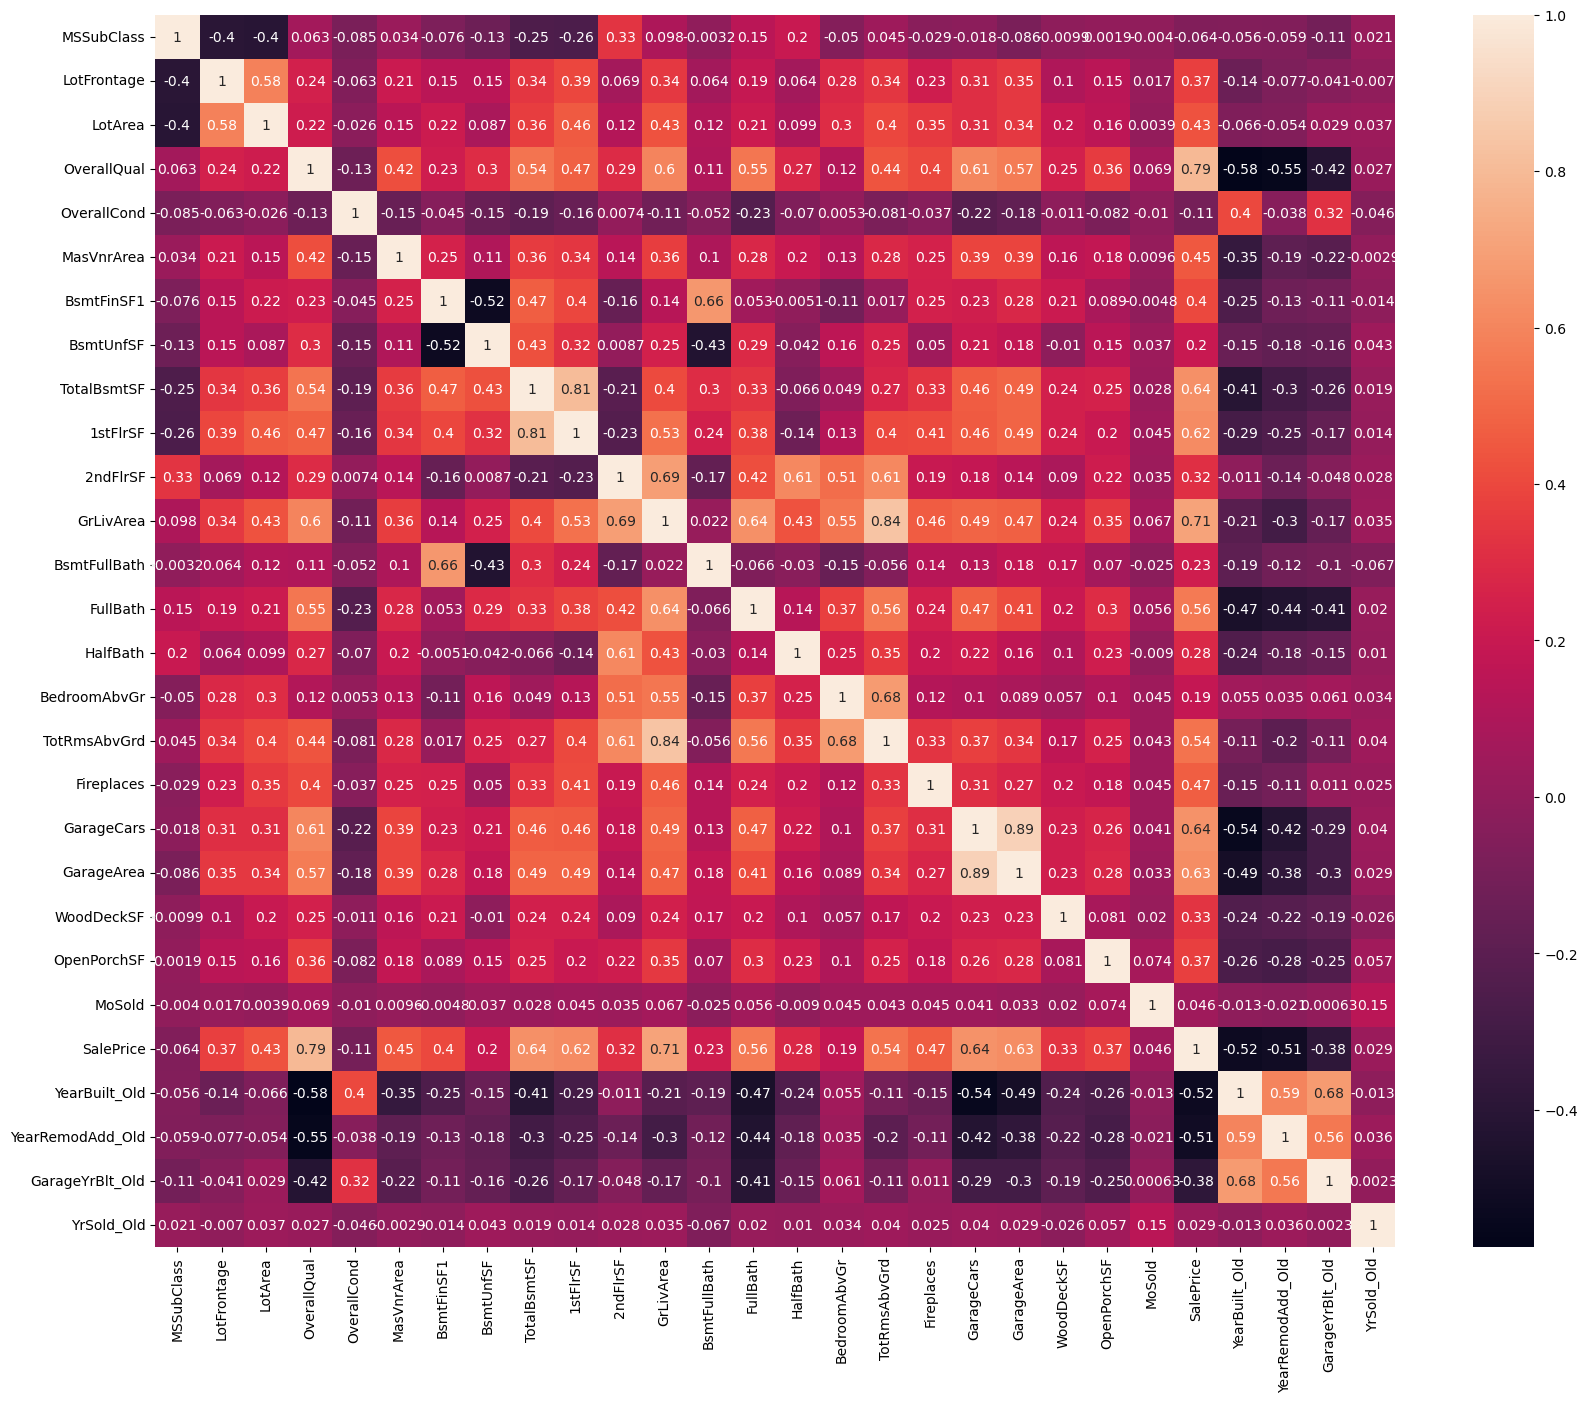

In [261]:
plt.figure(figsize=(20,16))
sns.heatmap(housing_df.corr(),annot=True)
plt.show()

##### Observations:
1. GarageCars have high correlation with GarageArea - 89%
2. TotRmsAbvGrid have high correlation with GrLivArea - 84%
3. TotalBsmtSF have high correlation with 1stFlrSF - 81%

So we can drop one of these feature from each pair.



In [262]:
housing_df.drop(['GarageCars', 'GrLivArea', '1stFlrSF'], axis=1, inplace=True)

#### Analysis on Categorical Variables

In [263]:
def build_box_subplots(df, predictor_feature_list, target_variable, figureSize, cols, rows):
    plt.figure(figsize=figureSize)
    for i, feature in enumerate(predictor_feature_list):
        plt.subplot(rows, cols, i+1)
        sns.boxplot(target_variable, df[feature])
        plt.xlabel(target_variable.name)
        plt.ylabel(predictor_feature_list[i])
        plt.subplots_adjust(hspace=2.0)
        plt.tight_layout()
    plt.show()

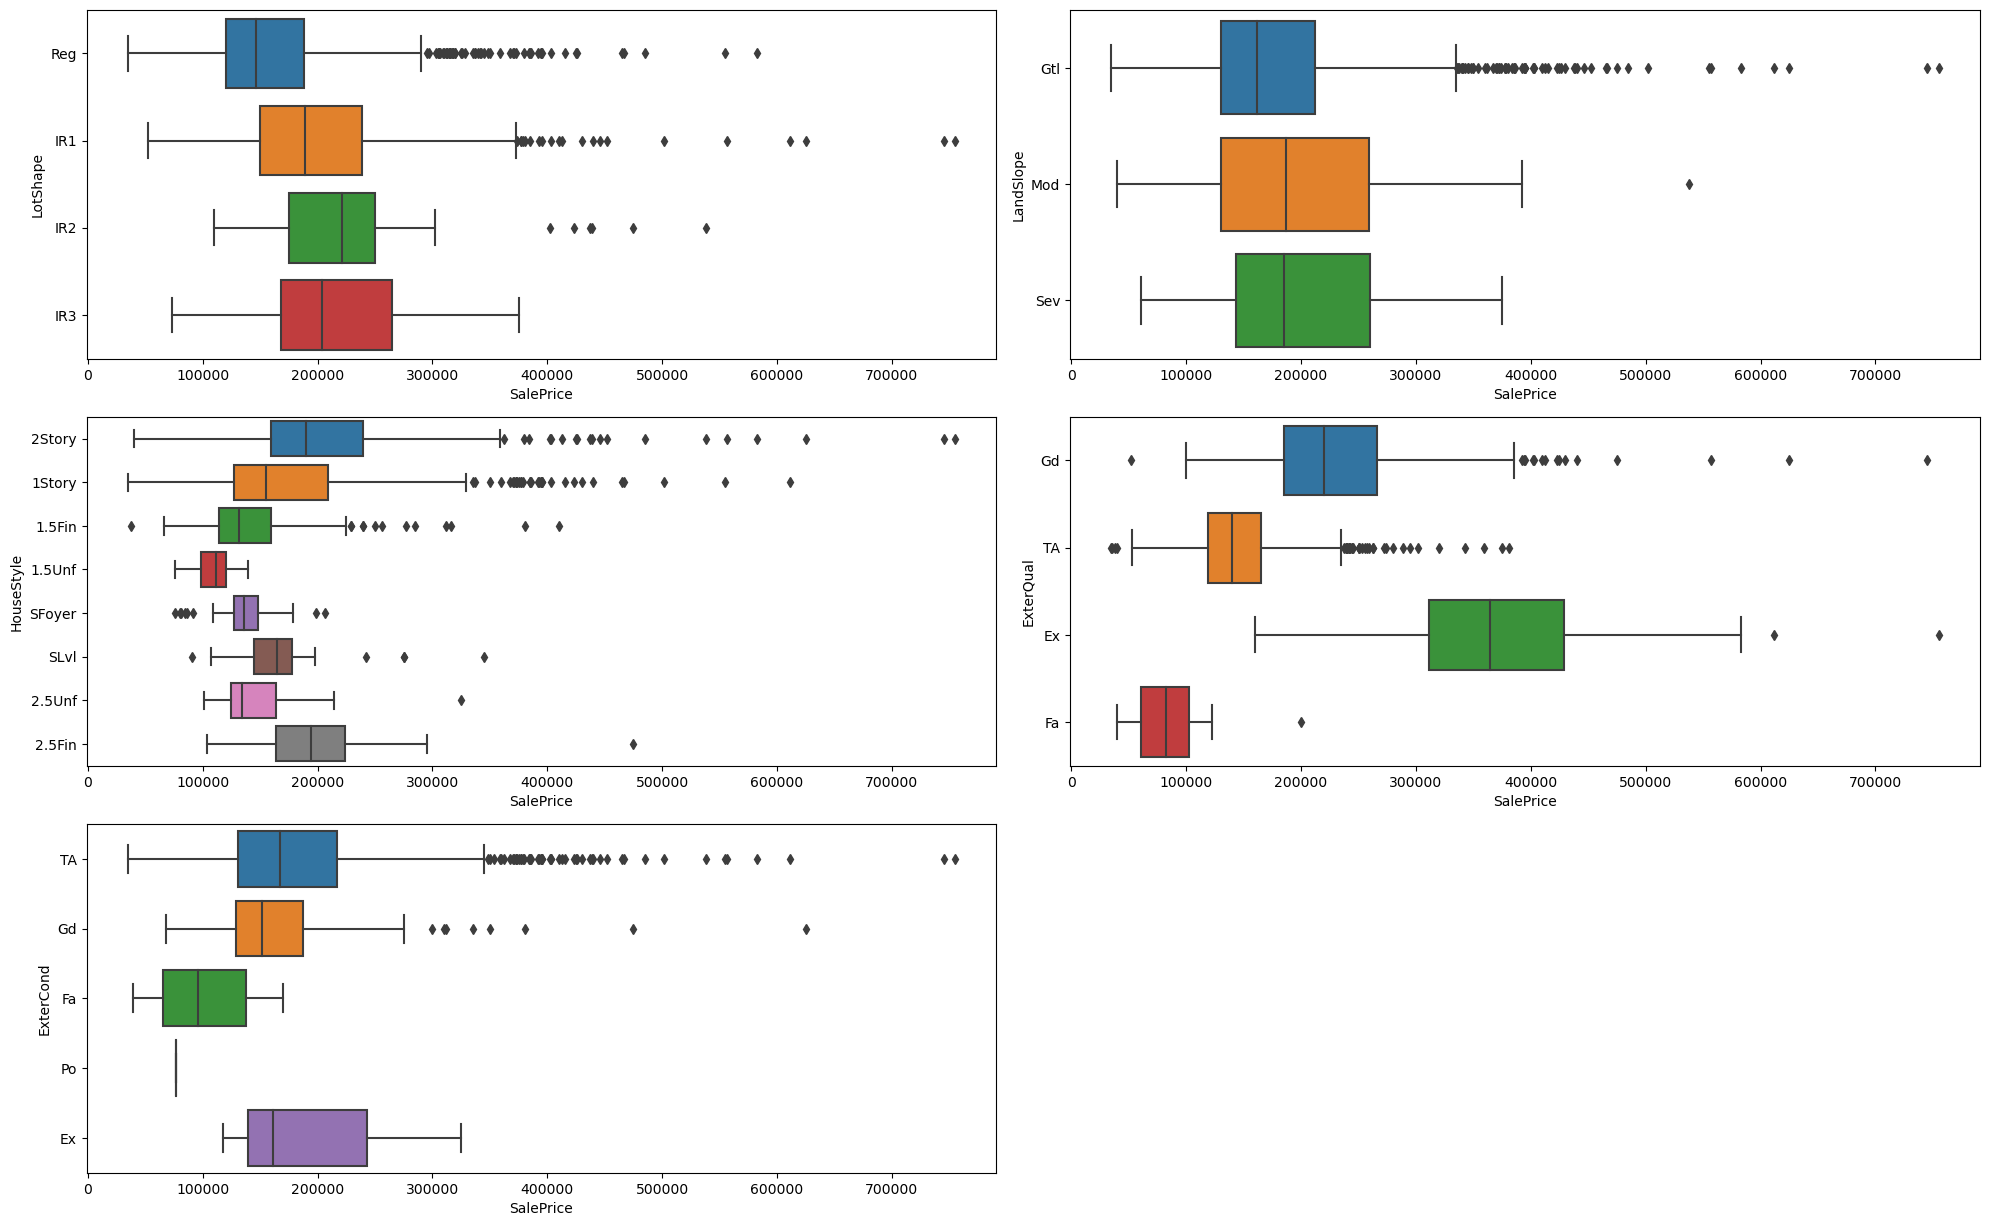

In [264]:
house_external_features = ['LotShape', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']

build_box_subplots(housing_df, house_external_features, housing_df.SalePrice, (20, 16), 2, 4)

### Observations:
1. LotShape : IR1 which represents slightly irregular lot shape have high Sale Price
2. LandSlope : Houses having severe land slope have less Sale Price
3. HouseStyle : Houses with 2 stories have high Sale Price
4. ExterQual : Houses having excellent quality of exterior have the high Sale Price
5. ExterCond : Houses having excellent condition of exterior have the high Sale Price

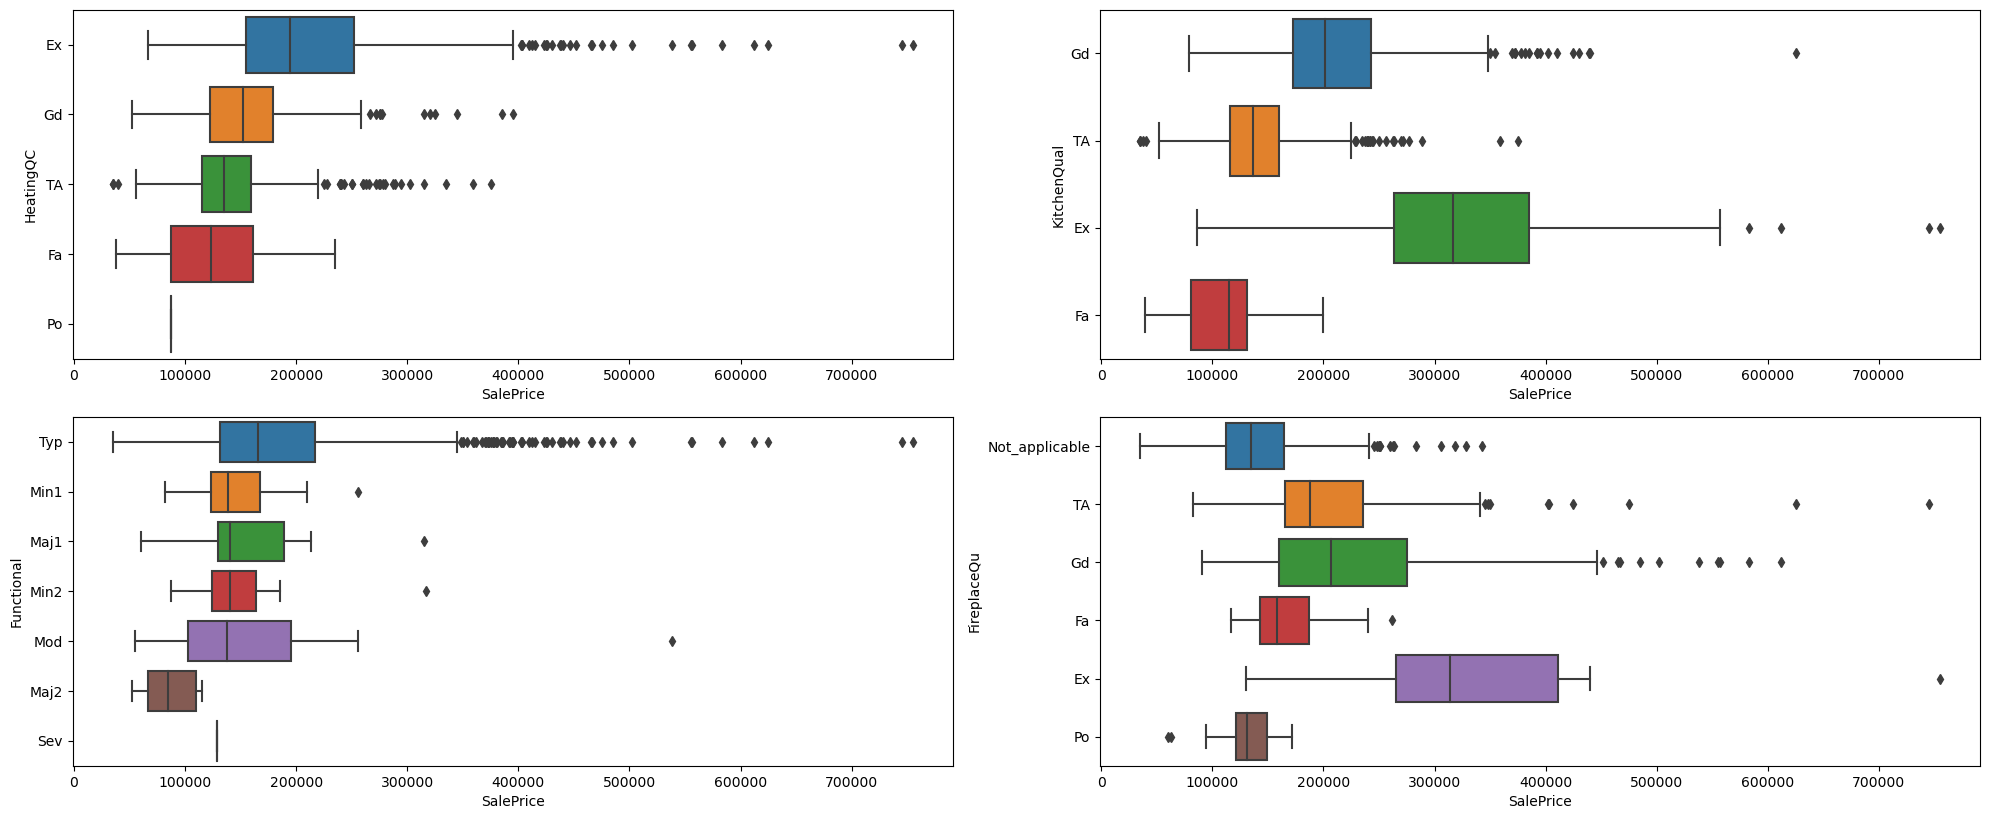

In [265]:
house_internal_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']
build_box_subplots(housing_df, house_internal_features, housing_df.SalePrice, (20, 16), 2, 4)

##### Observations:
1. Houses having excellent heating quality and kitchen quality have the highest Sale Price
2. Houses with typical functionality have highest Sale Price.
3. Very few houses that are severely damaged.
4. Houses having Good fireplace quality have high Sale Price.

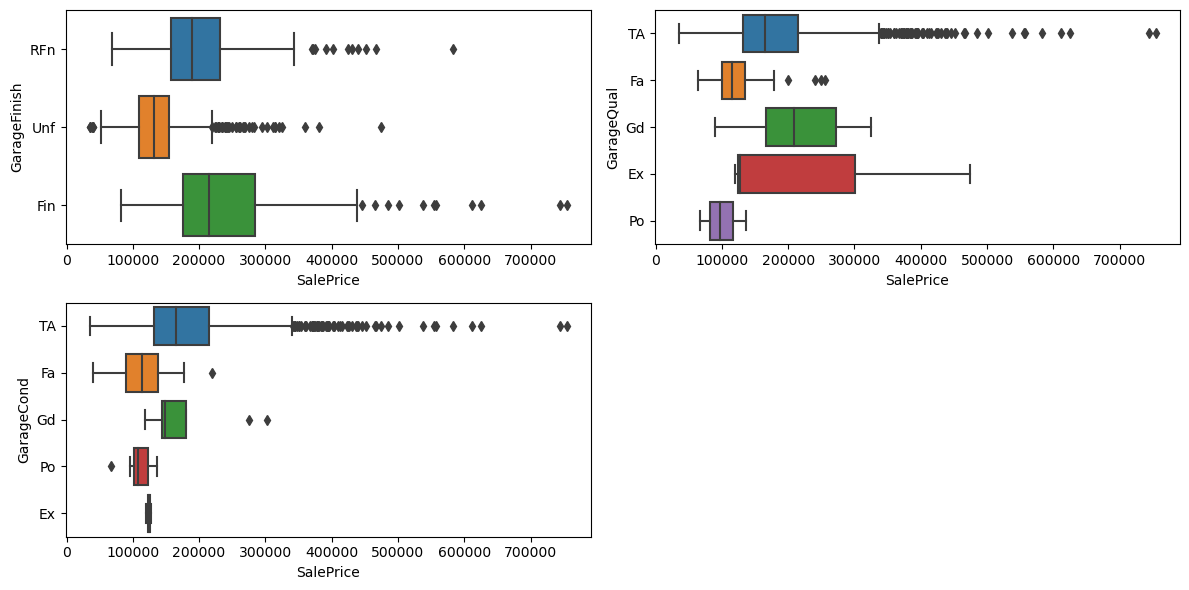

In [266]:
garage_features = ['GarageFinish', 'GarageQual','GarageCond']
build_box_subplots(housing_df, garage_features, housing_df.SalePrice, (12, 6), 2, 2)

##### Observations:
1. Houses having Fully Finished garage have high Sale Price
2. Houses having typical garage quality and condition have high Sale Price

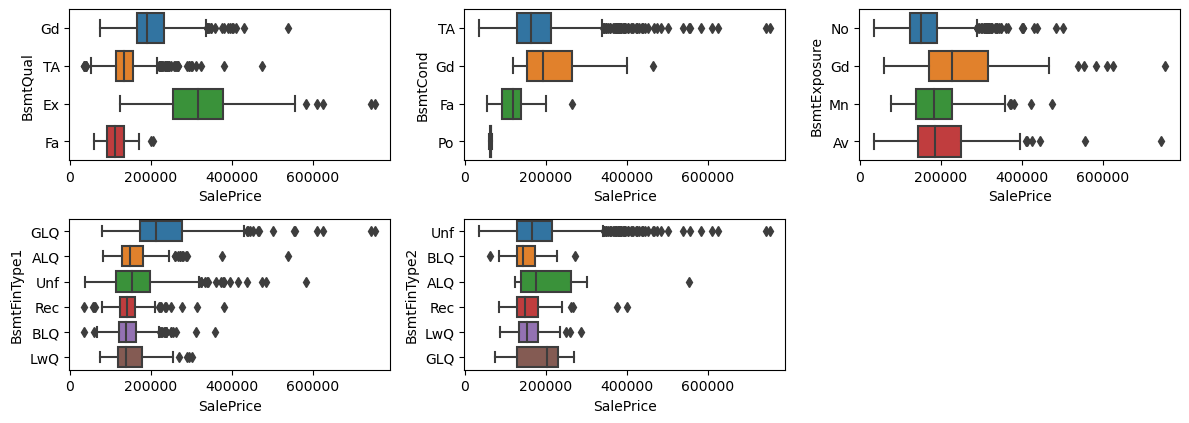

In [267]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
build_box_subplots(housing_df, basement_features, housing_df.SalePrice, (12, 6), 3, 3)

##### Observations
1. Houses having excellent basement quality have high Sale Price
2. Houses having typical basement conditioin have high Sale Price
3. Houses having good basement exposure have high Sale Price
4. Houses having good living quarters rating of basement finished area have high Sale Price
5. Houses having unfinished quarters rating of basement finished area have high Sale Price

#### Encoding Categorical Variables

In [268]:
housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [269]:
# Checking the features after encoding
housing_df[['LotShape', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1460 non-null   int64
 1   LandSlope     1460 non-null   int64
 2   HouseStyle    1460 non-null   int64
 3   ExterQual     1460 non-null   int64
 4   ExterCond     1460 non-null   int64
 5   BsmtQual      1460 non-null   int64
 6   BsmtCond      1460 non-null   int64
 7   BsmtExposure  1460 non-null   int64
 8   BsmtFinType1  1460 non-null   int64
 9   BsmtFinType2  1460 non-null   int64
 10  HeatingQC     1460 non-null   int64
 11  KitchenQual   1460 non-null   int64
 12  Functional    1460 non-null   int64
 13  FireplaceQu   1460 non-null   int64
 14  GarageFinish  1460 non-null   int64
 15  GarageQual    1460 non-null   int64
 16  GarageCond    1460 non-null   int64
dtypes: int64(17)
memory usage: 194.0 KB


### Unordered Catergorical Analysis

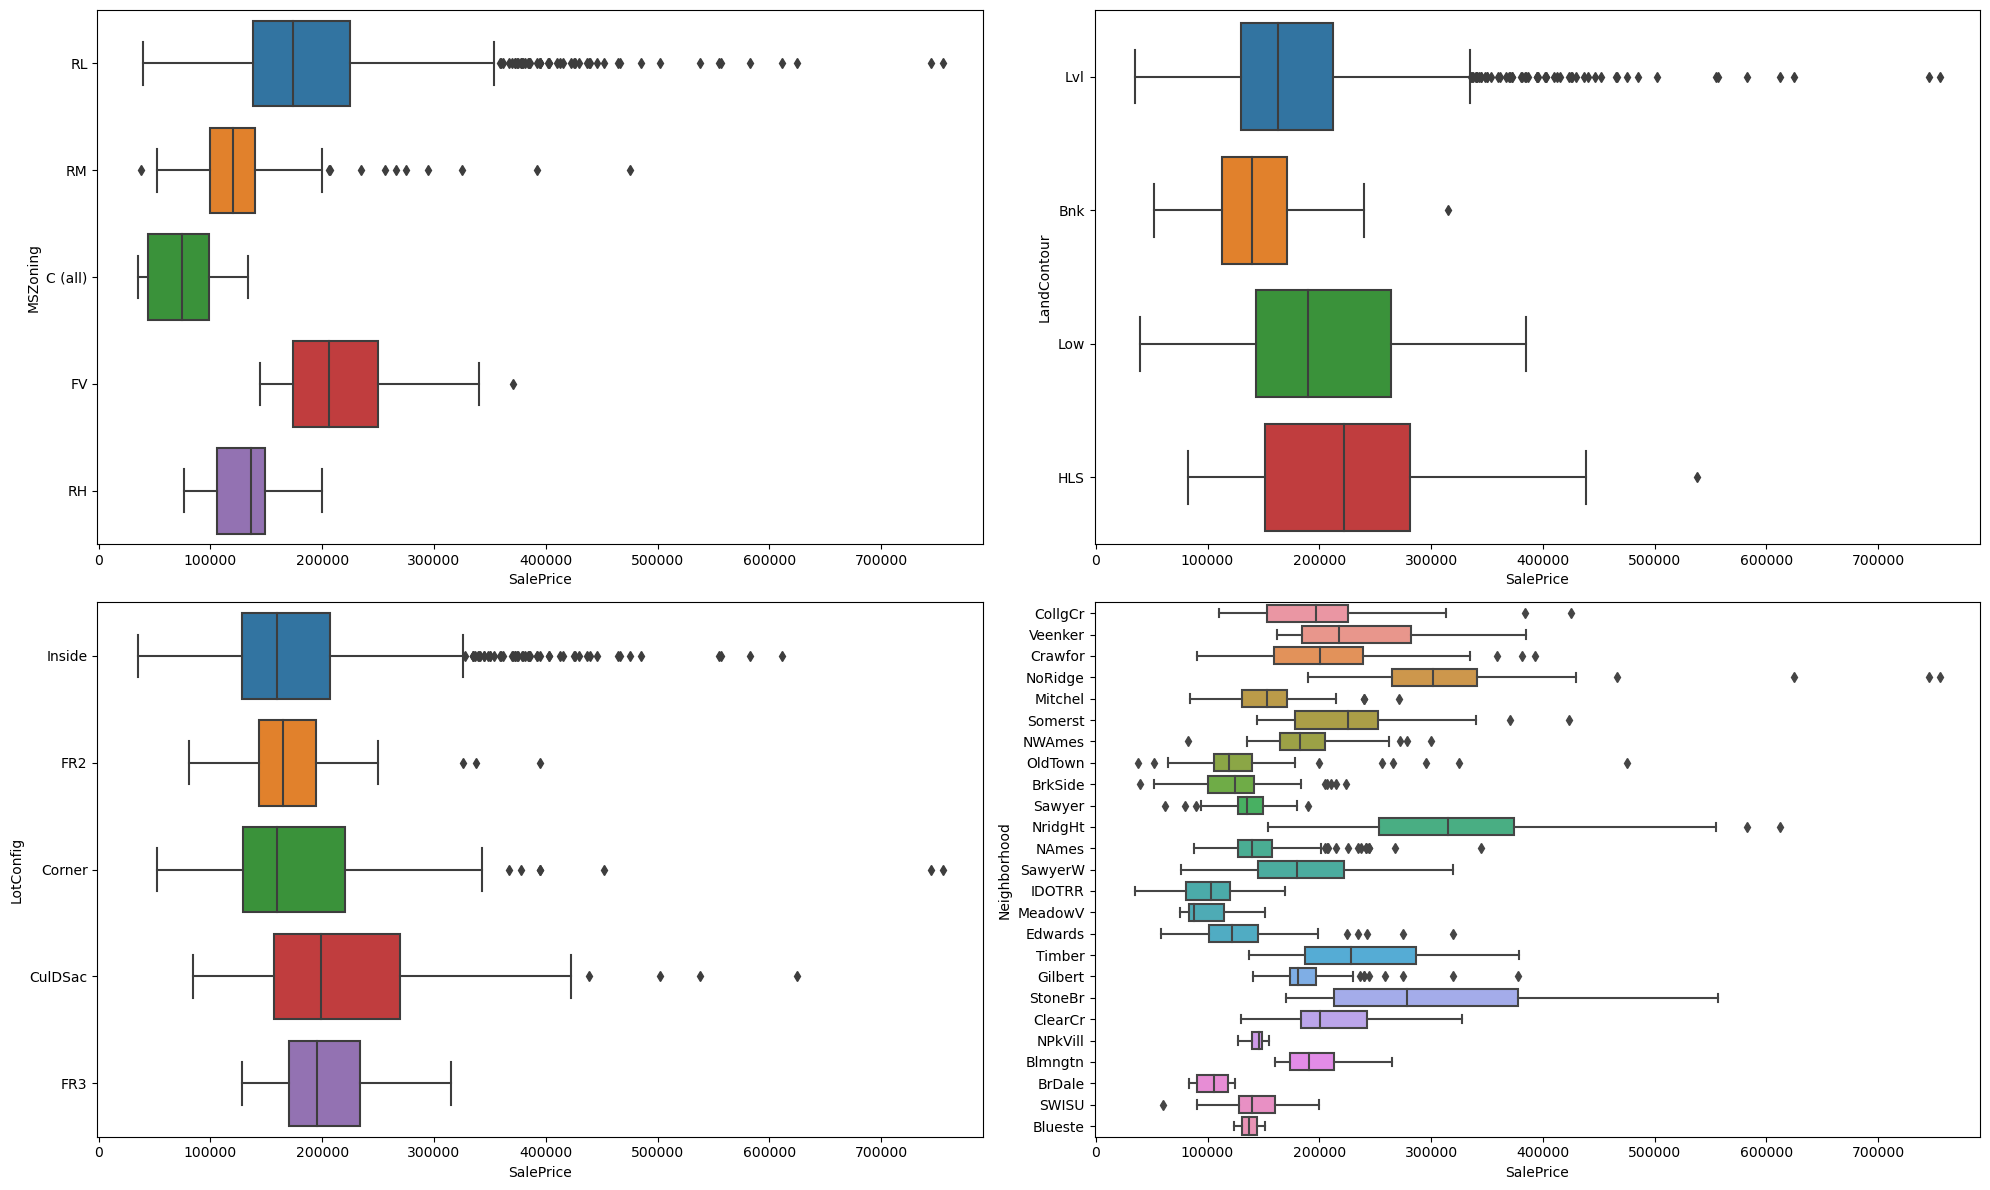

In [270]:
build_box_subplots(housing_df, ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood'], housing_df.SalePrice, (20, 12), 2, 2)

#### Observations:
1. Most of the houses having high sale price are classified as MSZoning - RL which is Residential low density
2. Housing with almost flat level surface have high sale price
3. Neighborhood have lot of labels, performing one-hot encoding will make lot of dummy variables

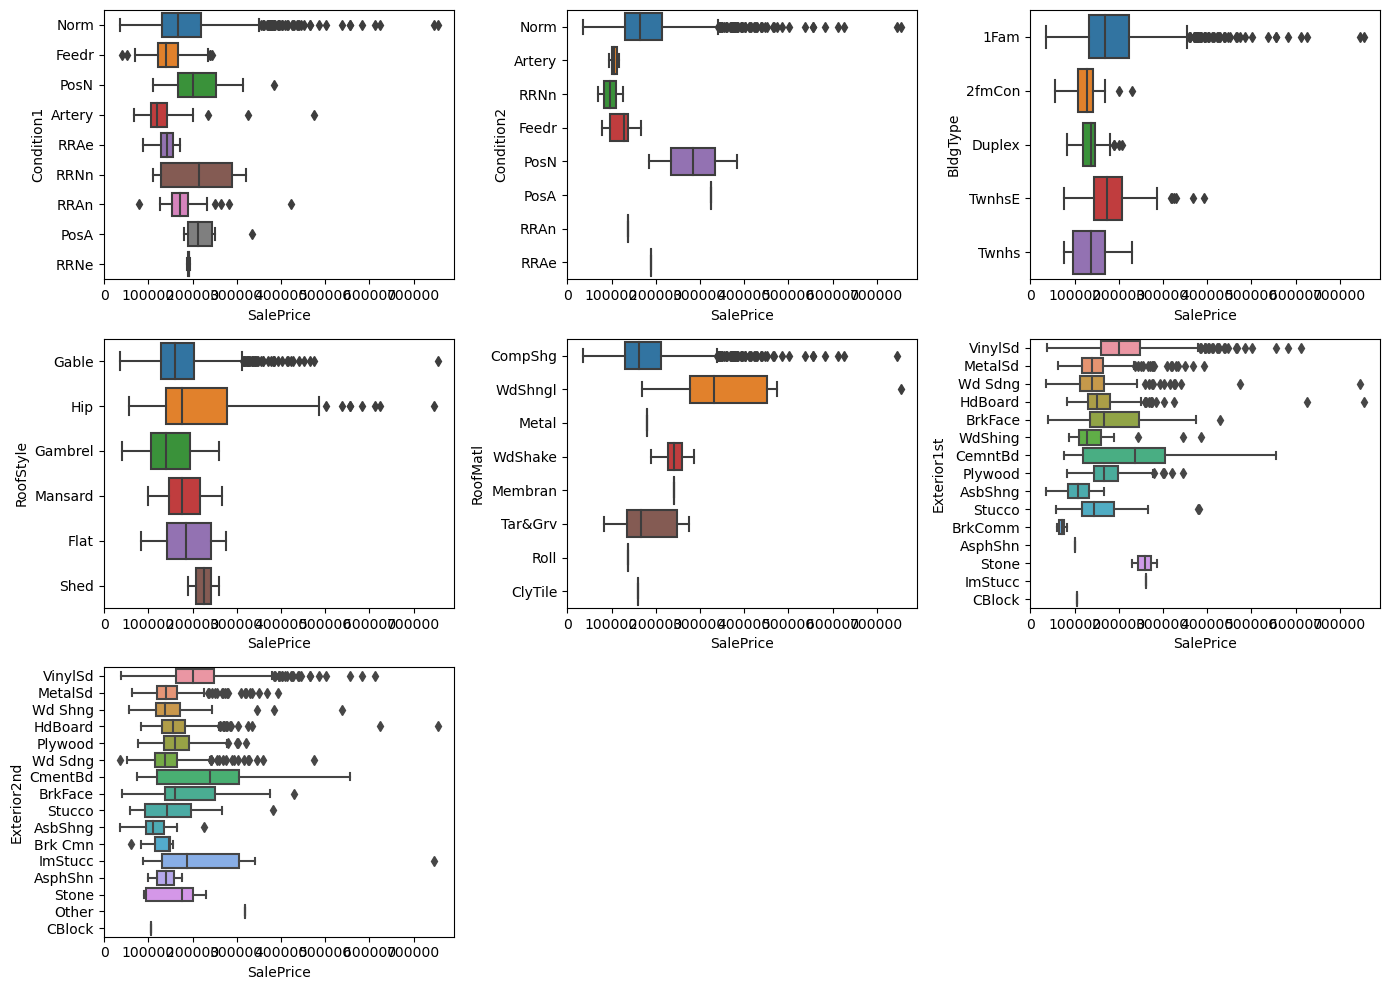

In [271]:
build_box_subplots(housing_df, ['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'], housing_df.SalePrice, (14, 10), 3, 3)

##### Observations:
1. Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
2. Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, these labels cannot contribute in predicting SalePricee.

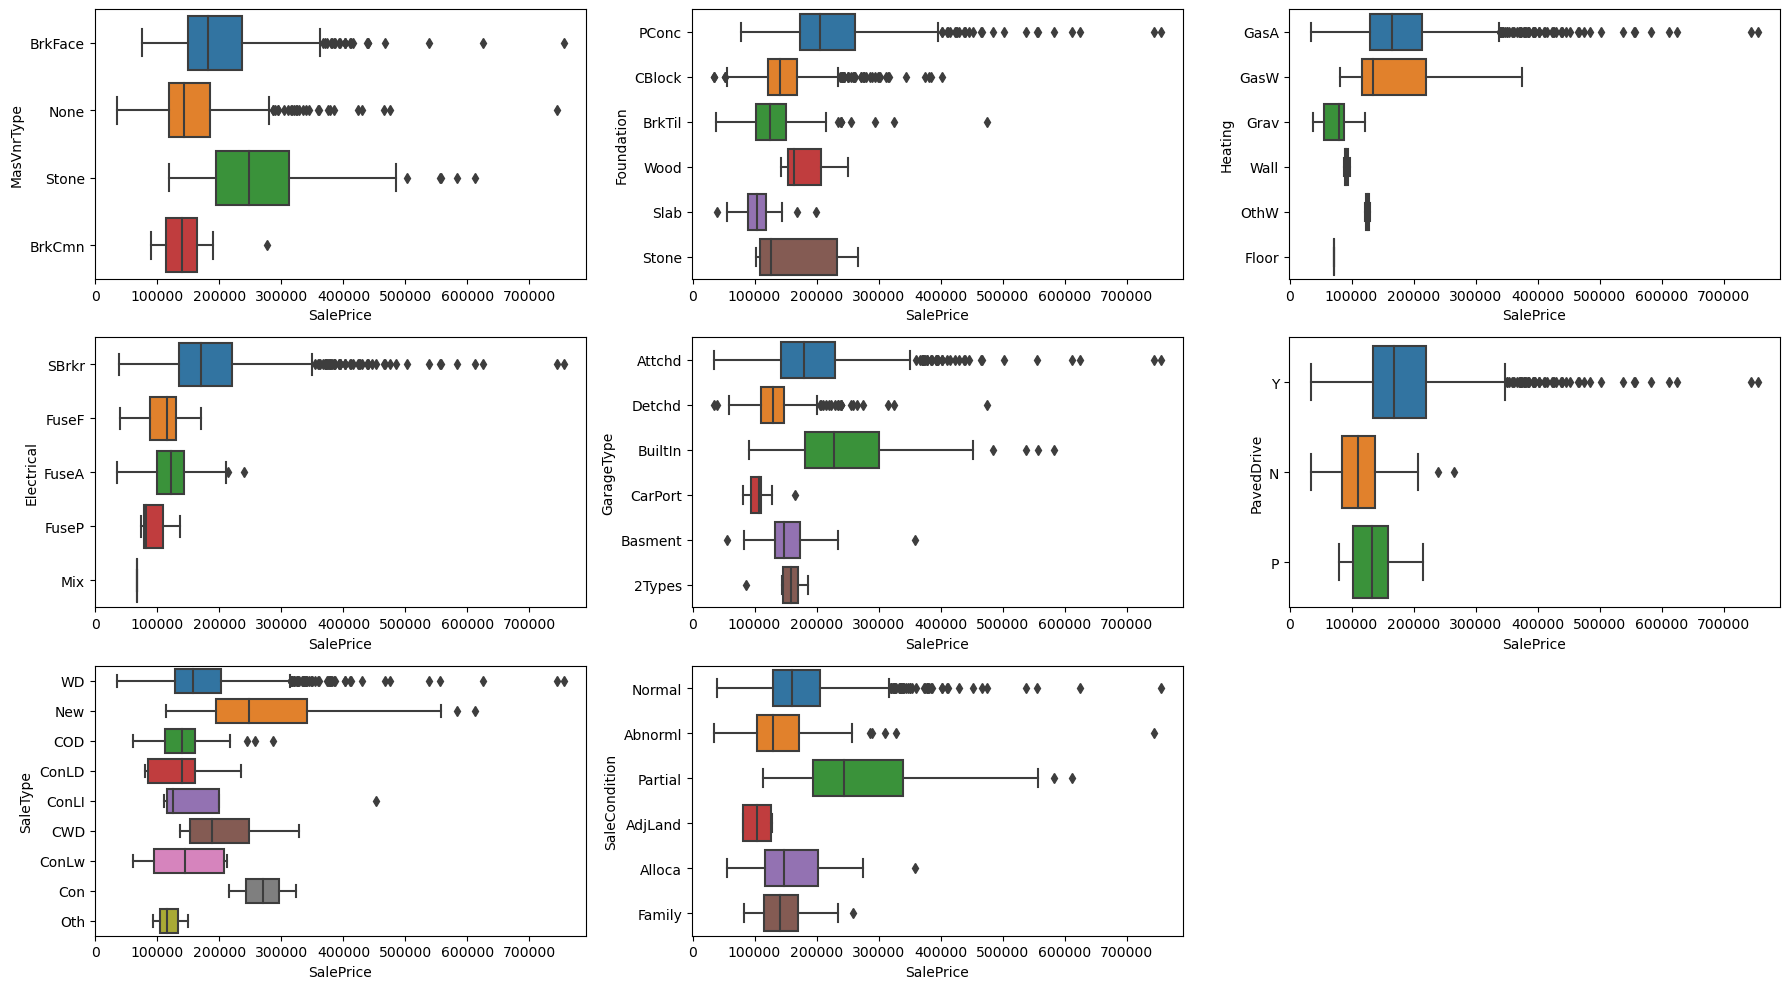

In [272]:
build_box_subplots(housing_df, ['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'SaleType','SaleCondition'], housing_df.SalePrice, (18, 10), 3, 3)

##### Observations:

1. Houses with foundation of poured concretea have the highest Sale Price 
2. Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest sale price
3. Houses with attached and built-in garage have high SalePrice
5. Most of the houses which are newly build and have condtion normal shows highest Sale Price

In [273]:
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'SaleType', 'SaleCondition', 'SalePrice', 'YearBuilt_Old',
       'YearRemodAdd_Old', 'GarageYrBlt_Old', 'YrSold_Old'],
      dtype='object')

In [274]:
unordered_variables = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 
                                            'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'SaleType','SaleCondition']

### Dummy Variable Creation

In [275]:
dummy_df = pd.get_dummies(housing_df[unordered_variables], drop_first=True)

In [276]:
dummy_df.shape

(1460, 132)

##### Comments:
1. Adding 132 dummy variables to the existing dataset will make the model very complex
2. From the above boxplots, for some categorical features only label is dominating over others. When we say dominating it means that the values of the target variable (the variable we are trying to predict) are heavily influenced by the categories of the categorical feature
3. In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [277]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_

In [278]:
# Dropping the highly imbalanced dummy variables
dummy_df = dummy_df.drop(dummies_to_drop, axis=1)
print(dummy_df.shape)

(1460, 45)


In [279]:
housing_df.shape

(1460, 62)

In [280]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df,dummy_df],axis=1)

# Dropping the redundant columns
housing_df = housing_df.drop(unordered_variables,axis=1)

In [281]:
housing_df.shape

(1460, 88)

# Splitting to Train and Test Data

In [282]:
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSZoning_RL,MSZoning_RM,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,0,3,7,5.0,196.0,3,2,4,3,1,6,706.0,1,150.0,856,4,1,854,1.0,2,1,3.0,3,8,0,0.0,0,2,548.0,3,3,0,61,2,7,7,7.0,2,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,1,1,0
1,20,80.0,9600.0,3,0,0,6,7.5,0.0,2,2,4,3,4,5,978.0,1,284.0,1262,4,1,0,0.0,2,0,3.0,2,6,0,1.0,3,2,460.0,3,3,298,0,5,34,34,34.0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,1,1,0
2,60,68.0,11250.0,0,0,3,7,5.0,162.0,3,2,4,3,2,6,486.0,1,434.0,920,4,1,866,1.0,2,1,3.0,3,6,0,1.0,3,2,608.0,3,3,0,42,9,9,8,9.0,2,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,1,1,0
3,70,60.0,9550.0,0,0,3,7,5.0,0.0,2,2,3,4,1,5,216.0,1,540.0,756,3,1,756,1.0,1,0,3.0,3,7,0,1.0,4,1,642.0,3,3,0,35,2,95,40,12.0,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
4,60,84.0,14260.0,0,0,3,8,5.0,350.0,3,2,4,3,3,6,655.0,1,490.0,1145,4,1,1053,1.0,2,1,4.0,3,9,0,1.0,3,2,836.0,3,3,192,84,12,10,10,10.0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,1,1,0


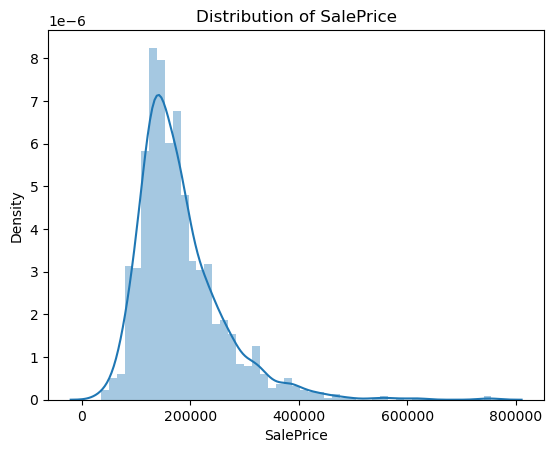

In [283]:
# Checking the distribution of target variable
plt.title('Distribution of SalePrice')
sns.distplot(housing_df.SalePrice)
plt.show()

##### Note: SalePrice is highly skewed towards right. Lets check the SalePrice with log transformation

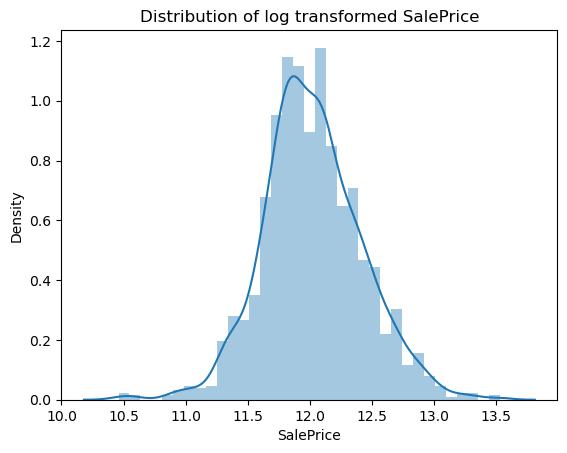

In [284]:
sns.distplot(np.log(housing_df.SalePrice))
plt.title('Distribution of log transformed SalePrice')
plt.show()

##### Observation: Log scalled SalePrice is normally distributed, hence we will transform the SalePrice to log for model builing

In [285]:
y = np.log(housing_df.SalePrice)
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.860999
54      11.775290
55      12

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [287]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 87)
(292, 87)
(1168,)
(292,)


### Feature Scaling

In [288]:
standardScaler = StandardScaler()
X_train_transform = pd.DataFrame(data=standardScaler.fit_transform(X_train), columns=X_train.columns)
X_test_transform = pd.DataFrame(standardScaler.transform(X_test), columns=X_test.columns)

In [289]:
X_train_transform.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSZoning_RL,MSZoning_RM,LandContour_Lvl,LotConfig_CulDSac,LotConfig_Inside,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition2_Norm,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Heating_GasA,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03
mean,5.589136e-17,1.084559e-16,2.007527e-16,7.623278e-17,-5.859563e-16,3.326867e-17,1.925781e-16,-7.469292e-16,-6.905625e-17,3.189990e-16,-7.178904e-16,1.477129e-16,-2.604462e-17,3.193792e-16,3.106343e-16,-4.182347e-17,1.156799e-16,-9.353249e-17,1.878254e-16,1.932434e-16,-7.309602e-17,1.086460e-16,-1.186266e-16,-1.116877e-16,-7.955965e-17,-1.197672e-17,6.248807e-16,2.373482e-16,1.582638e-17,-4.543550e-17,5.265955e-17,-2.281280e-17,-2.290786e-17,-2.284607e-16,-6.595989e-16,-1.557449e-16,7.566246e-17,5.437051e-17,7.965470e-17,4.809699e-17,3.459942e-17,-8.839961e-17,1.093113e-16,2.181474e-16,1.571232e-16,-1.249951e-16,6.368574e-17,-3.063569e-16,2.746091e-16,-3.320688e-16,-3.410514e-16,3.126780e-16,2.285082e-16,4.937071e-16,-1.362114e-16,-1.532735e-16,4.570165e-16,4.362948e-17,5.714607e-16,-5.798254e-17,1.975208e-16,1.701930e-16,-2.280330e-16,3.177633e-16,-1.963802e-16,7.870417e-17,7.499709e-17,-1.090262e-16,5.496935e-16,-1.250902e-16,2.796469e-16,-1.080281e-16,2.847798e-16,-1.043686e-16,9.125121e-18,-4.087294e-17,-2.813579e-17,9.638409e-17,-8.735402e-17,8.564306e-17,5.237439e-17,3.663356e-16,-5.113870e-17,2.690010e-17,-4.285955e-16,-3.438079e-16,-8.051018e-17
std,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.

#### Performing Cross Validation technique to create optimized model without revealing test data

In [290]:
# k-fold CV (using all the 13 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train_transform, y_train, scoring='r2', cv=5)
scores

array([ 8.92198038e-01,  8.65508826e-01,  8.52830430e-01, -1.74067014e+22,
        8.82387869e-01])

### Lets tune the hyperparameters to get the optimized model

In [291]:

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 70))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_transform, y_train)      

Fitting 5 folds for each of 69 candidates, totalling 345 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [292]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.369396,0.153626,0.002401,0.000972,1,{'n_features_to_select': 1},0.696086,0.675963,0.677207,5.232282e-01,0.648947,6.442862e-01,6.236533e-02,49,0.641058,0.644648,0.645524,0.675504,0.652622,0.651871,0.012397
1,0.290163,0.020427,0.002285,0.000390,2,{'n_features_to_select': 2},0.729587,0.736322,0.743576,5.912162e-01,0.715988,7.033378e-01,5.679327e-02,48,0.706487,0.703662,0.703005,0.733240,0.709417,0.711162,0.011271
2,0.311350,0.047673,0.002458,0.000697,3,{'n_features_to_select': 3},0.790047,0.772948,0.764789,6.917851e-01,0.752031,7.543200e-01,3.361220e-02,47,0.752651,0.756167,0.758616,0.772245,0.762225,0.760381,0.006705
3,0.285800,0.021316,0.002065,0.000358,4,{'n_features_to_select': 4},0.796494,0.796939,0.789961,7.261843e-01,0.779216,7.777588e-01,2.657000e-02,46,0.779500,0.779168,0.781281,0.793346,0.784005,0.783460,0.005232
4,0.299489,0.063565,0.001834,0.000325,5,{'n_features_to_select': 5},0.806993,0.822771,0.833981,7.870940e-01,0.801701,8.105082e-01,1.636769e-02,45,0.815799,0.812112,0.809415,0.819066,0.817991,0.814876,0.003621
5,0.291994,0.023546,0.002006,0.000303,6,{'n_features_to_select': 6},0.837775,0.839754,0.860227,8.140199e-01,0.813103,8.329756e-01,1.769673e-02,44,0.835440,0.835266,0.830079,0.840064,0.842707,0.836711,0.004356
6,0.298913,0.033001,0.002143,0.000614,7,{'n_features_to_select': 7},0.838276,0.838457,0.869722,8.203523e-01,0.815724,8.365061e-01,1.898989e-02,43,0.845715,0.848950,0.840863,0.851486,0.852475,0.847898,0.004223
7,0.294793,0.027087,0.001610,0.000124,8,{'n_features_to_select': 8},0.857303,0.836303,0.870451,8.396698e-01,0.820695,8.448844e-01,1.728478e-02,42,0.854537,0.856090,0.845225,0.859031,0.859103,0.854797,0.005096
8,0.278894,0.021358,0.002402,0.000367,9,{'n_features_to_select': 9},0.861082,0.839632,0.882359,8.411743e-01,0.833730,8.515955e-01,1.792919e-02,41,0.862109,0.866769,0.853812,0.863873,0.866913,0.862695,0.004797
9,0.297784,0.063134,0.002928,0.000956,10,{'n_features_to_select': 10},0.866771,0.844693,0.888944,8.532897e-01,0.832197,8.571789e-01,1.947402e-02,40,0.867349,0.869278,0.858302,0.869087,0.873570,0.867517,0.005043


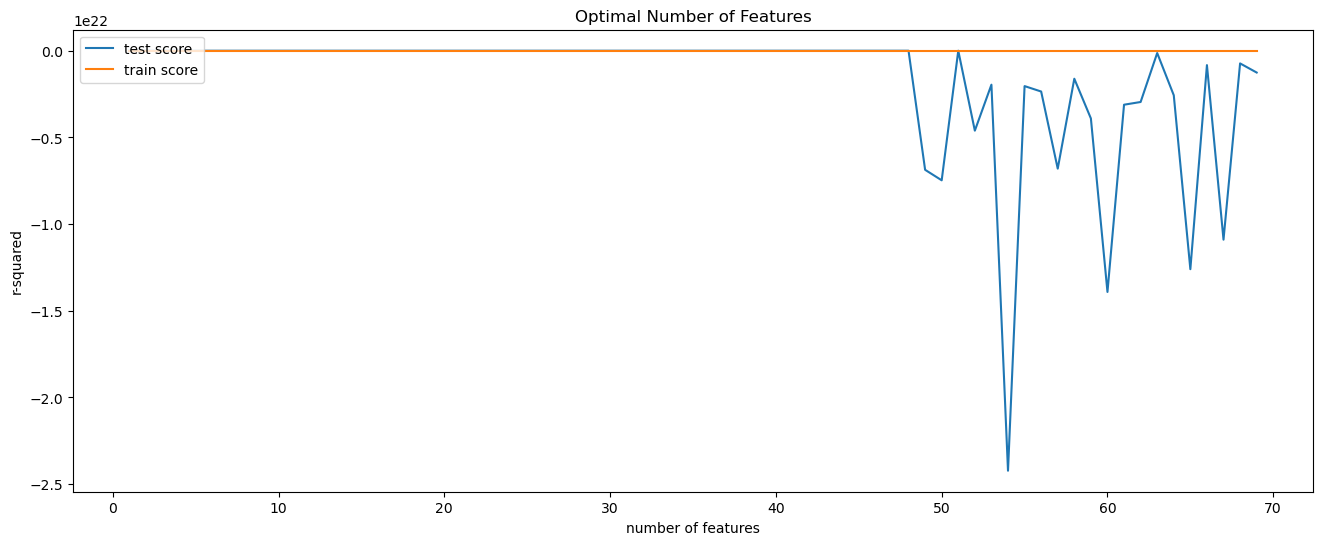

In [293]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

##### Observation: Based on the above line graph we can take 48 number of features for our model as after that there is lot of fluctuation in test score which shows that after 48 features from train model showing high variance.

### Feature Selection: RFE

In [294]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_train_transform, y_train)
    rfe = RFE(linear_m, n_features_to_select=n)
    rfe = rfe.fit(X_train_transform, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_train_transform.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [295]:
top_48_features = top_n_features(48)

Top 48 features : 
['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'BsmtQual', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageArea', 'GarageQual', 'YearBuilt_Old', 'YearRemodAdd_Old', 'GarageYrBlt_Old', 'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_PConc', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']


In [296]:
# Given the training data and list of features, this will provide the statistical summary of the model

X_train_ols = sm.add_constant(X_train_transform[top_48_features])
lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     209.6
Date:                Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:32:17   Log-Likelihood:                 785.42
No. Observations:                1168   AIC:                            -1473.
Df Residuals:                    1119   BIC:                            -1225.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.03

#### Observation: With 48 features we have to good R2 and adjusted_R2 values on the training data

In [297]:
X_train_rfe = X_train_transform[top_48_features]
X_test_rfe = X_test_transform[top_48_features]

In [298]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

### Ridge Regression

In [299]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted_ridge = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.8997533566735502
R2 score (test) :  0.896124907190861
RMSE (train) :  0.12362054125955631
RMSE (test) :  0.13922821742534822


#### Observation:
1. With Ridge regression we are able to achieve R2 Score of 89.61% on test data. Meaning 89.61% of the variance in test data can be explained by our model.
2. Root Mean Square Error on test data is 0.139 means the prediction made by the model is of by 0.139 units which is quite good.

In [300]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso_final_model, y_test_predicted_lasso = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


Optimum alpha for lasso is 0.000100
lasso  Regression with  0.0001
R2 score (train) :  0.8999049675644986
R2 score (test) :  0.896919769511356
RMSE (train) :  0.12352702534981973
RMSE (test) :  0.1386945005156649


#### Observation:
1. With Lasso regression we are able to achieve R2 Score of 89.69% on test data which is very similar to Ridge regression. Meaning 89.69% of the variance in test data can be explained by our model.
2. Root Mean Square Error on test data is 0.138 means the prediction made by the model is of by 0.138 units which is quite good.

## Comparing Model Coffecients

In [301]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=20.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
model_coefficients

,Ridge (alpha=20.0),Lasso (alpha=0.0001)
MSSubClass,-0.017490,-0.017679
LotArea,0.037675,0.037415
LandSlope,0.012426,0.012651
OverallQual,0.084335,0.086599
OverallCond,0.041810,0.042738
BsmtQual,0.022614,0.021076
BsmtExposure,0.015316,0.014792
BsmtUnfSF,-0.025217,-0.027912
TotalBsmtSF,0.090564,0.095333
HeatingQC,0.009744,0.009215


### Observation on Final Model

##### Observation: 
As Lasso regression gave me slightly good R2 score and RMSE value on test data compare to Ridge regression so we will be going with Lasso's model

In [302]:
# 48 features ordered by feature importance in Lasso Regression
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)

,Lasso (alpha=0.0001)
TotalBsmtSF,0.095333
OverallQual,0.086599
2ndFlrSF,0.053600
TotRmsAbvGrd,0.044455
OverallCond,0.042738
GarageArea,0.040046
LotArea,0.037415
FullBath,0.028194
Exterior2nd_Wd Sdng,0.021203
BsmtQual,0.021076


In [303]:
# top 10 good predictors of SalePrice for Houses
top_10_features = list(model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10])
top_10_features

['TotalBsmtSF',
 'OverallQual',
 '2ndFlrSF',
 'TotRmsAbvGrd',
 'OverallCond',
 'GarageArea',
 'LotArea',
 'FullBath',
 'Exterior2nd_Wd Sdng',
 'BsmtQual']

# Model Evaluation

#### 

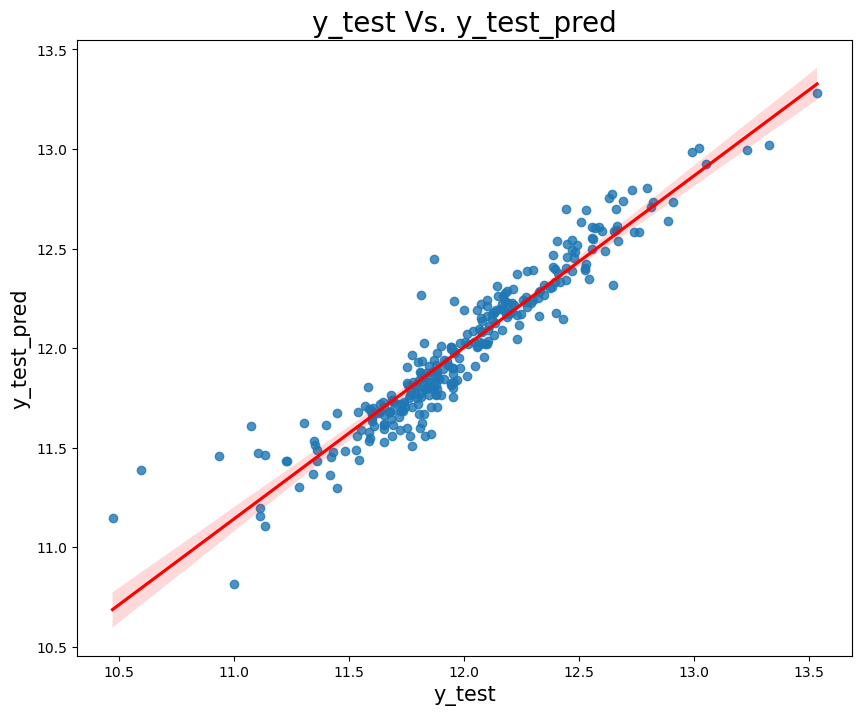

In [304]:
# Let's visualize y_test vs. y_test_pred
plt.figure(figsize=(10, 8))
reg_plot = sns.regplot(x=y_test, y=y_test_predicted_lasso, line_kws={'color': 'red'})
plt.title('y_test Vs. y_test_pred', fontdict={'fontsize': 20})
plt.xlabel('y_test', fontdict={'fontsize': 15})
plt.ylabel('y_test_pred', fontdict={'fontsize': 15})

plt.show()

# Observation: Graph shows linear relation and is showing a good fit regression line

Text(0, 0.5, 'residuals')

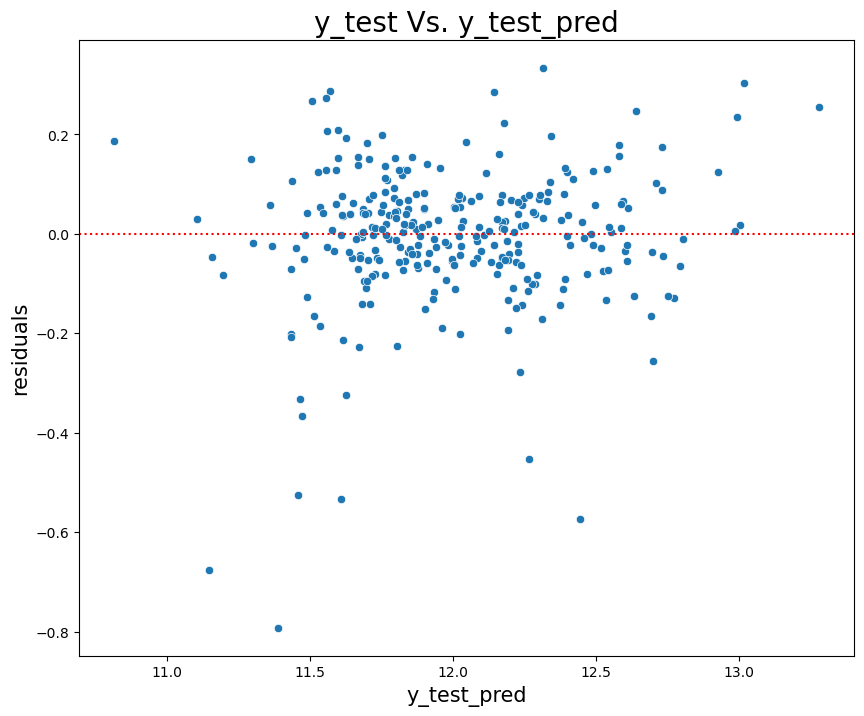

In [305]:
residuals = y_test - y_test_predicted_lasso
plt.figure(figsize=(10, 8))
reg_plot = sns.scatterplot(x=y_test_predicted_lasso, y=residuals)
plt.axhline(y=0, color='r', linestyle=':')
plt.title('y_test Vs. y_test_pred', fontdict={'fontsize': 20})
plt.xlabel('y_test_pred', fontdict={'fontsize': 15})
plt.ylabel('residuals', fontdict={'fontsize': 15})

# Observation: Homoscedasticity is shown. There are no visible patters for the residuals which shows
# that error terms are independent.

Text(0.5, 0, 'Errors')

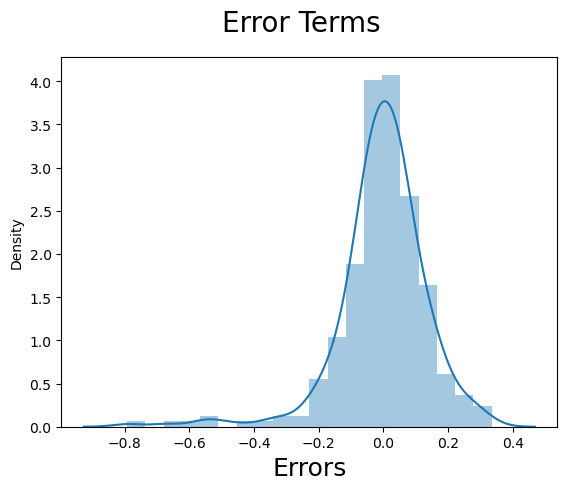

In [306]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_predicted_lasso), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

# Observation: Normality of error terms are visible.

#### Building Scatter plot to check the predictions visually

In [307]:
def build_prediction_scatter_plot(df, predictor_feature_list, target_variable, y_test_pred, figureSize, cols, rows):
    plt.figure(figsize=figureSize)
    y_test_pred = np.array(y_test_pred).reshape(-1,1)
    for i, feature in enumerate(predictor_feature_list):
        df[feature] = np.array(df[feature]).reshape(-1,1)
        plt.subplot(rows, cols, i+1)
        plt.scatter(df[feature], target_variable, color='red')
        plt.scatter(df[feature] , y_test_pred , color = 'blue' )
        plt.xlabel(feature)
        plt.ylabel(target_variable.name)
        plt.subplots_adjust(hspace=2.0)
        plt.legend()
        plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

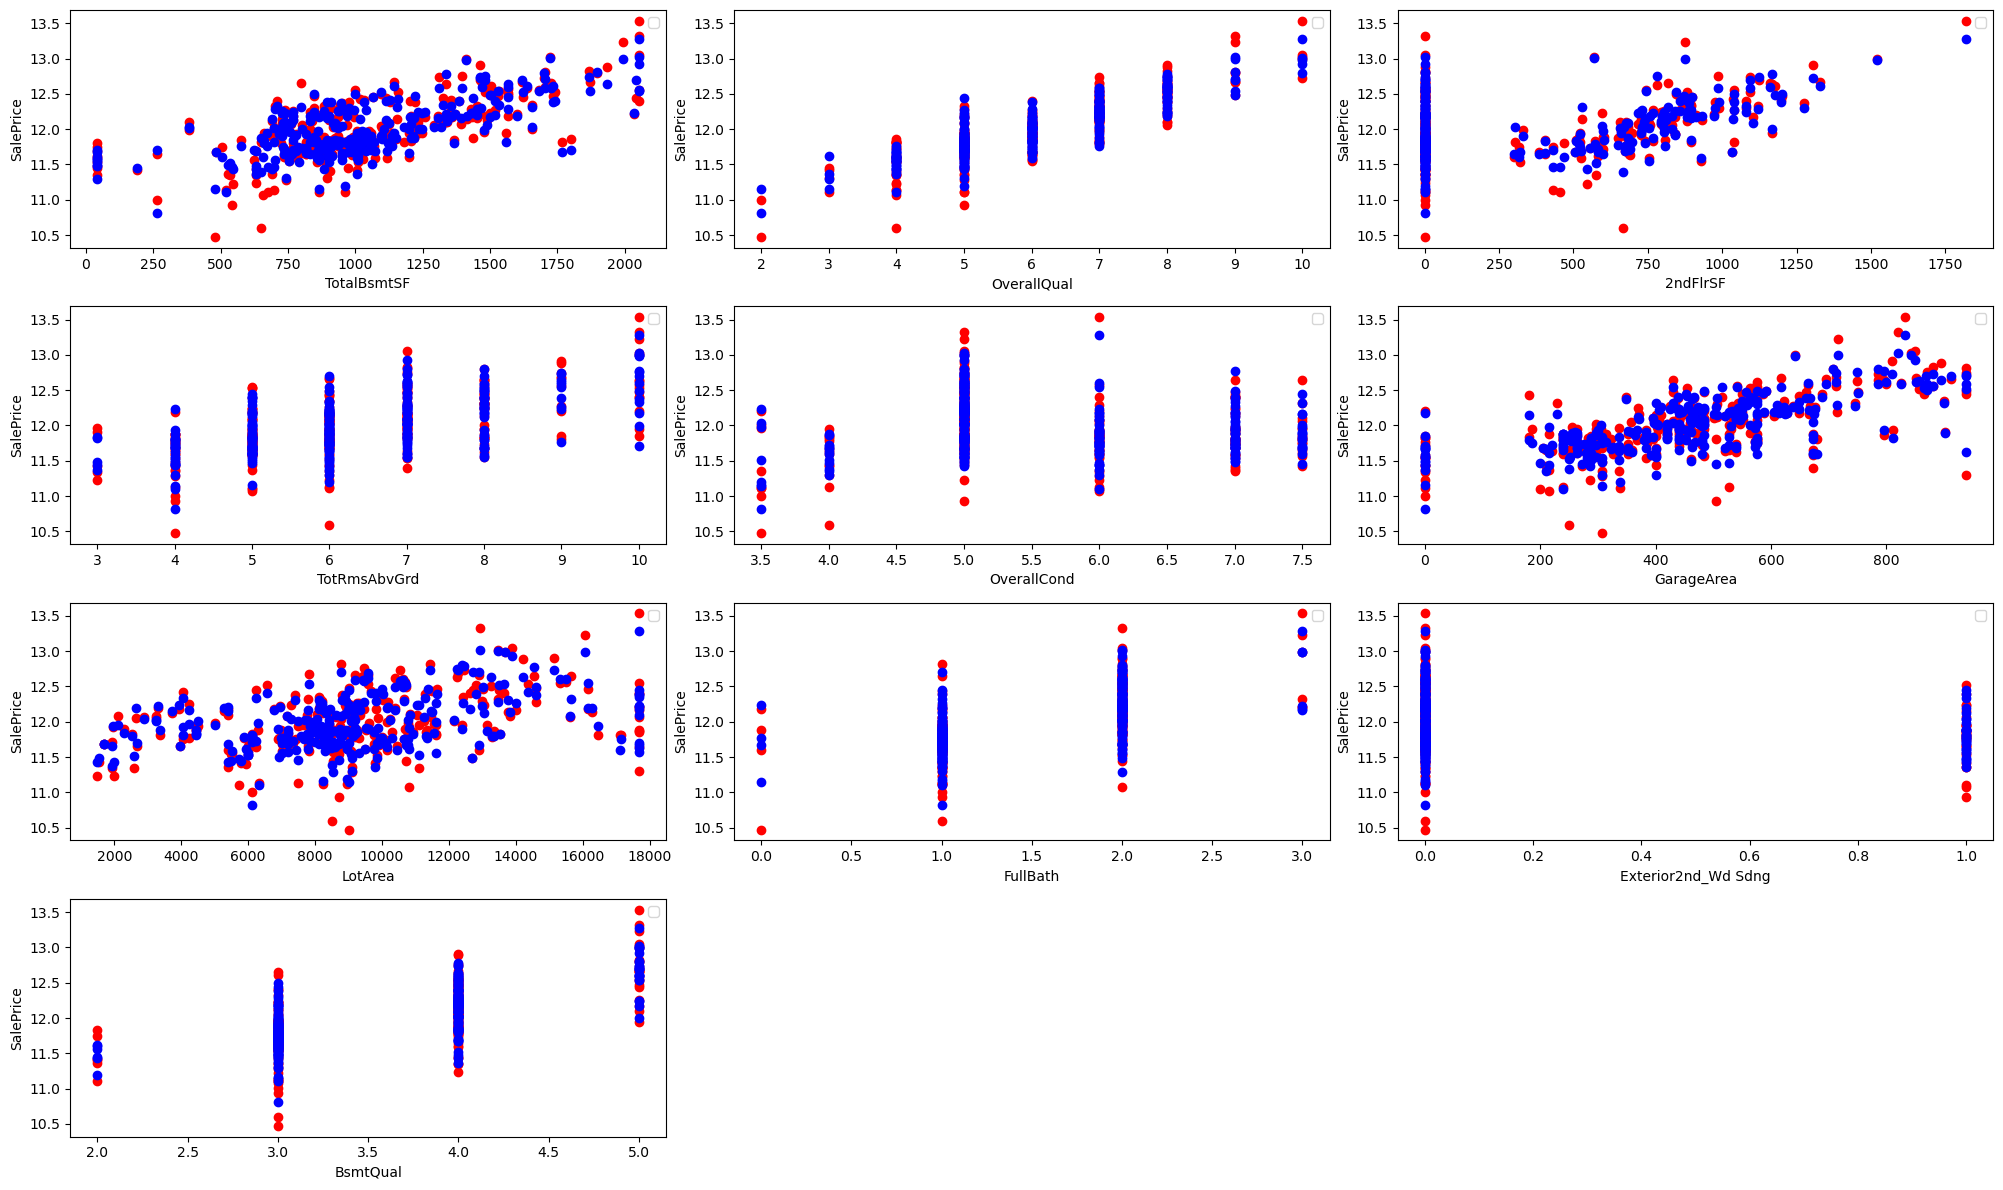

In [308]:
build_prediction_scatter_plot(X_test, top_10_features, y_test, y_test_predicted_lasso, (20, 12), 3, 4)

# Observations: Prediction made my the model on test data is showing good results.

# Subjective Question Code Solution

In [309]:
ridge_model_with_double_alpha = Ridge(alpha=40)
ridge_model_with_double_alpha.fit(X_train_rfe, y_train)

y_train_pred = ridge_model_with_double_alpha.predict(X_train_rfe)
y_test_pred = ridge_model_with_double_alpha.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=40.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=40.0
R2 score (train) :  0.8994
R2 score (test) :  0.8953
RMSE (train) :  0.1238
RMSE (test) :  0.1398


In [310]:
lasso_model_with_double_alpha = Lasso(alpha=0.0002)
lasso_model_with_double_alpha.fit(X_train_rfe, y_train)

y_train_pred = lasso_model_with_double_alpha.predict(X_train_rfe)
y_test_pred = lasso_model_with_double_alpha.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.8998
R2 score (test) :  0.897
RMSE (train) :  0.1236
RMSE (test) :  0.1386


In [311]:
model_coefficients['Ridge (alpha = 40.0)'] = ridge_model_with_double_alpha.coef_
model_coefficients['Lasso (alpha = 0.0002)'] = lasso_model_with_double_alpha.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=20.0),Lasso (alpha=0.0001),Ridge (alpha = 40.0),Lasso (alpha = 0.0002)
MSSubClass,-0.017490,-0.017679,-0.016908,-0.017207
LotArea,0.037675,0.037415,0.037881,0.037490
LandSlope,0.012426,0.012651,0.012176,0.012532
OverallQual,0.084335,0.086599,0.082375,0.086806
OverallCond,0.041810,0.042738,0.040908,0.042772
BsmtQual,0.022614,0.021076,0.023809,0.021138
BsmtExposure,0.015316,0.014792,0.015646,0.014685
BsmtUnfSF,-0.025217,-0.027912,-0.022868,-0.027831
TotalBsmtSF,0.090564,0.095333,0.086619,0.095284
HeatingQC,0.009744,0.009215,0.010169,0.009235


In [312]:
model_coefficients.sort_values(by='Lasso (alpha = 0.0002)', ascending=False).head(1)

,Ridge (alpha=20.0),Lasso (alpha=0.0001),Ridge (alpha = 40.0),Lasso (alpha = 0.0002)
TotalBsmtSF,0.090564,0.095333,0.086619,0.095284


In [313]:
model_coefficients.sort_values(by='Ridge (alpha = 40.0)', ascending=False).head(1)


,Ridge (alpha=20.0),Lasso (alpha=0.0001),Ridge (alpha = 40.0),Lasso (alpha = 0.0002)
TotalBsmtSF,0.090564,0.095333,0.086619,0.095284


In [314]:
# Top 5 features of Lasso model
model_coefficients.sort_values(by='Lasso (alpha=0.0001)', ascending=False).head(5)

,Ridge (alpha=20.0),Lasso (alpha=0.0001),Ridge (alpha = 40.0),Lasso (alpha = 0.0002)
TotalBsmtSF,0.090564,0.095333,0.086619,0.095284
OverallQual,0.084335,0.086599,0.082375,0.086806
2ndFlrSF,0.050335,0.053600,0.047573,0.053186
TotRmsAbvGrd,0.044546,0.044455,0.044416,0.044311
OverallCond,0.041810,0.042738,0.040908,0.042772


In [315]:
X_train_new = X_train_rfe.drop(['TotalBsmtSF', 'OverallQual', '2ndFlrSF', 'TotRmsAbvGrd', 'OverallCond'], axis=1)

In [316]:
X_test_new = X_test_rfe.drop(['TotalBsmtSF', 'OverallQual', '2ndFlrSF', 'TotRmsAbvGrd', 'OverallCond'], axis=1)

In [317]:
alpha = 0.0001
lasso_model_new = Lasso(alpha=alpha)
lasso_model_new.fit(X_train_new, y_train)
y_train_pred = lasso_model_new.predict(X_train_new)
y_test_pred = lasso_model_new.predict(X_test_new)

In [318]:
lasso_model_new.coef_

array([-0.01780256,  0.06213149,  0.0038469 ,  0.05748682,  0.02706481,
        0.02348902,  0.01809076,  0.02692478,  0.04523139,  0.08860469,
        0.05749307,  0.04927617, -0.02685632,  0.02747543,  0.03369753,
        0.05772592,  0.01397649,  0.021758  , -0.03943058,  0.02984343,
       -0.01463852,  0.01461893, -0.01774053, -0.02694319, -0.02773912,
        0.01936784,  0.00796072,  0.00409076, -0.02269508, -0.01561546,
       -0.01732745, -0.03215752,  0.0087966 ,  0.00095686,  0.02454778,
        0.02549989,  0.01268953,  0.02587727,  0.0001156 ,  0.03343816,
        0.0132198 ,  0.01316311,  0.0124385 ])

In [319]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model_new.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
FullBath,0.088605
LotArea,0.062131
GarageArea,0.057726
HalfBath,0.057493
BsmtQual,0.057487
